# AE
- MVTechADの論文に従って１万枚にデータ拡張
- 200エポック学習

In [1]:
import sys
import glob
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [3]:
result_dir = "./dc_img/21"
dirlist = sorted(glob.glob(os.path.join(result_dir, "*")))
classnames = sorted(list(set([os.path.basename(d).split('_')[1] for d in dirlist])))
classnames = [c if c!='metal' else 'metal_nut' for c in classnames]
print(classnames)

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']


In [4]:
# %%html
# <style>
# div.input {
#     display:none;
# }
# </style>

## 200epoch目のAUC

In [5]:
print("classname\t seed0, seed1, seed2 ...., avg")
for c in classnames:
    print("{:<15}".format(c), end=' ')
    eachclass_results = glob.glob(os.path.join(result_dir, "MSE_{c}_128_MSELOSS_full_10time*".format(c=c)))
    avg = 0
    l = len(eachclass_results)
    # print(l, end=' / ')
    for directory in eachclass_results:
        plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
        with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
            # maxauc = np.max(plots_auc["val"][1][:100]) # 100エポックで打ち切り
            maxauc = plots_auc["val"][1][199] # 100epoch目で決め打ち
            avg += maxauc
            print("{:.3f}".format(maxauc), end=' ')
    if l != 0:
        avg /= len(eachclass_results)
        print("\t200epoch = {:.3f}".format(avg))
    else:
        print("")

classname	 seed0, seed1, seed2 ...., avg
bottle          0.887 0.867 0.883 0.796 0.816 0.541 0.867 0.874 0.848 0.910 	200epoch = 0.829
cable           0.745 0.749 0.747 0.653 0.731 0.745 0.757 0.776 0.718 0.757 	200epoch = 0.738
capsule         0.534 0.536 0.606 0.545 0.496 0.608 0.538 0.442 0.604 0.524 	200epoch = 0.543
carpet          0.603 0.444 0.463 0.702 0.393 0.597 0.353 0.455 0.404 0.383 	200epoch = 0.480
grid            0.821 0.853 0.785 0.768 0.713 0.826 0.810 0.841 0.819 0.824 	200epoch = 0.806
hazelnut        0.819 0.800 0.854 0.814 0.881 0.732 0.819 0.799 0.855 0.895 	200epoch = 0.827
leather         0.665 0.735 0.701 0.708 0.575 0.701 0.748 0.693 0.743 0.730 	200epoch = 0.700
metal_nut       0.588 0.555 0.599 0.599 0.590 0.599 0.546 0.548 0.537 0.560 	200epoch = 0.572
pill            0.687 0.811 0.670 0.679 0.735 0.750 0.741 0.705 0.787 0.737 	200epoch = 0.730
screw           0.104 0.199 0.681 0.117 0.162 0.019 0.366 0.172 0.476 0.254 	200epoch = 0.255
tile            0.5

In [6]:
## AUCの最終値 (300エポック)

In [7]:
# for directory in dirlist:
#     print("{:<15}".format(directory.split('/')[-1][4:-38]), end=' ')
#     plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
#     with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
#         print("{:.2f}".format(plots_auc["val"][1][-1]))

In [8]:
## AUCの最大値と最終値(300epoch)の比較

In [9]:
# print("{:<15}\t{}\t{}".format("label", "max", "last"))
# for directory in dirlist:
#     print("{:<15}".format(directory.split('/')[-1][4:-38]), end=' ')
#     plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
#     with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
#         print("{:.2f}".format(np.max(plots_auc["val"][1])), end='\t')
#         print("{:.2f}".format(plots_auc["val"][1][-1]))

In [10]:
# ## ScrewのAUCのグラフ
# - 横軸 : epoch
# - 縦軸 : AUC

# AEの学習がうまくいっておらず初期値の方が良い例

In [11]:
def plot_graph(screw_dir):
    plots_auc_name = os.path.join(screw_dir, '0000_plots_auc.pcl')
    with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
    plt.rcParams['figure.figsize'] = (5.0, 5.0)
    plt.figure()
    plt.title('Screw')
    plt.plot(plots_auc["val"][1])

In [12]:
def plot_class(c):
    screw_dirs = glob.glob(os.path.join(result_dir, "*"+c+"*"))
    interact(plot_graph, screw_dir=screw_dirs)

In [13]:
# interact(plot_class, c=classnames)

In [14]:
# ## BottleのAUCのグラフ
# - 横軸 : epoch
# - 縦軸 : AUC

# 最終値のAUCで問題なさそうな例

In [15]:
# screw_dir = glob.glob(os.path.join(result_dir, "*bottle*"))[0]
# plots_auc_name = os.path.join(screw_dir, '0000_plots_auc.pcl')
# with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
# plt.rcParams['figure.figsize'] = (5.0, 5.0)
# plt.figure()
# plt.title('bottle')
# plt.plot(plots_auc["val"][1])

In [16]:
def loadfile(filename):
    with open(filename, 'rb') as f:
        tmp = pickle.load(f)

## AEの平均
それぞれの平均の最大値

bottle 5


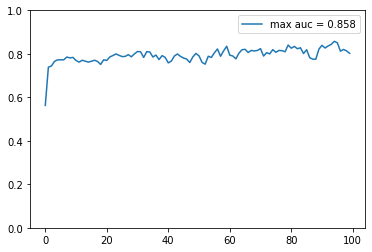

cable 5


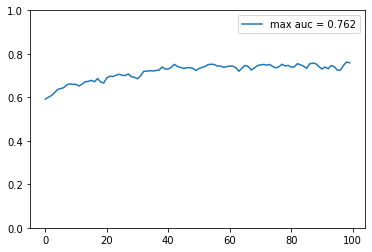

capsule 5


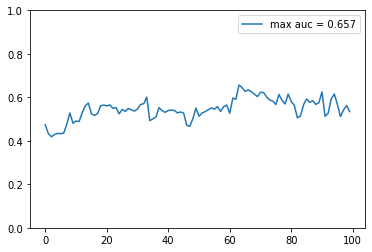

carpet 5


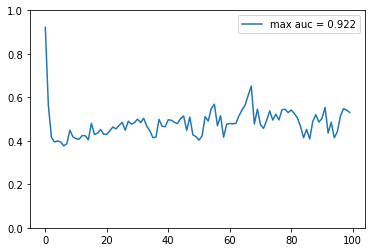

grid 5


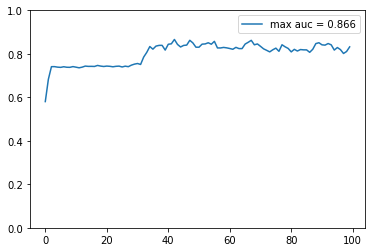

hazelnut 5


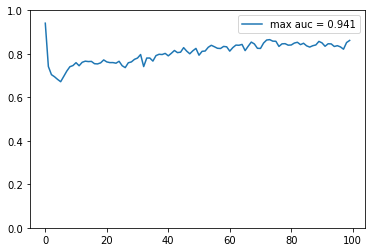

leather 5


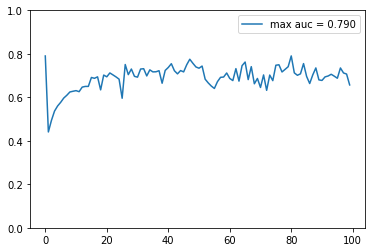

metal_nut 5


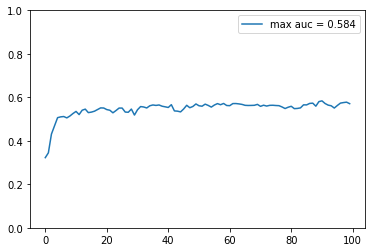

pill 5


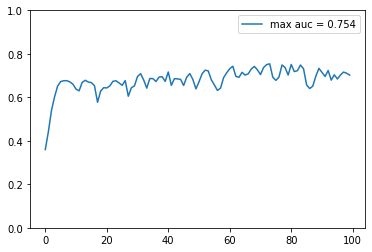

screw 5


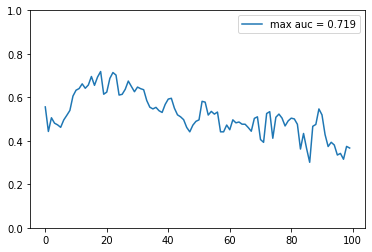

tile 5


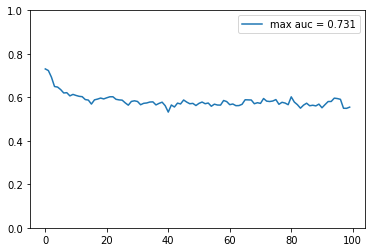

toothbrush 5


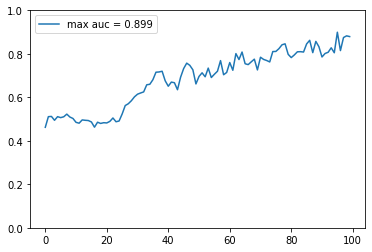

transistor 5


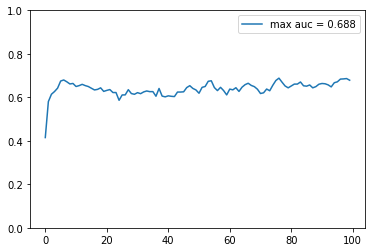

wood 5


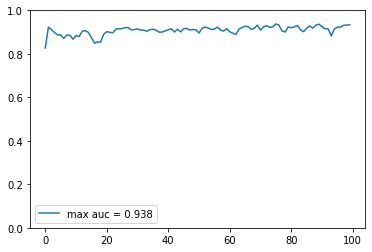

zipper 5


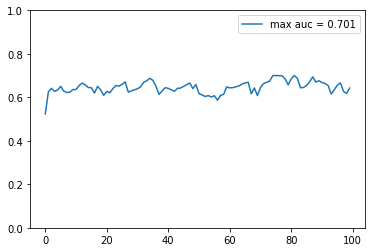

In [17]:
for c in classnames:
    eachclass_results = glob.glob(os.path.join(result_dir, "MSE_{c}_128_MSELOSS_full_10time*".format(c=c)))[:5]
    avg = 0
    l = len(eachclass_results)
    print(c, l)
    plots = []
    for directory in eachclass_results:
        plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
        with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
            v = plots_auc["val"][1][:100] # 100エポックで打ち切り
            plots.append(v)
    m = np.mean(plots, axis=0)
    plt.ylim(0, 1)
    plt.plot(m, label="max auc = {:.3f}".format(np.max(m)))
    plt.legend()
    plt.show()